<h2 style='color:green' align='center'>Simple Linear Regression Example</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# mean_squared_error function is used to compute the average of the squared differences between actual and predicted values.
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the CSV file
data = pd.read_csv('HOUSE_1.csv')

In [2]:
#Strip whitespace from column names.
data.columns = data.columns.str.strip()

In [3]:
#selected columns. In this time we need only price and area for Simple Linear Regression Example
selected_columns = data[['area', 'price']]
#show first 5 rows
selected_columns.head()  

,area,price
0,999,100000
1,1100,120000
2,800,70000
3,1500,160000
4,500,70000


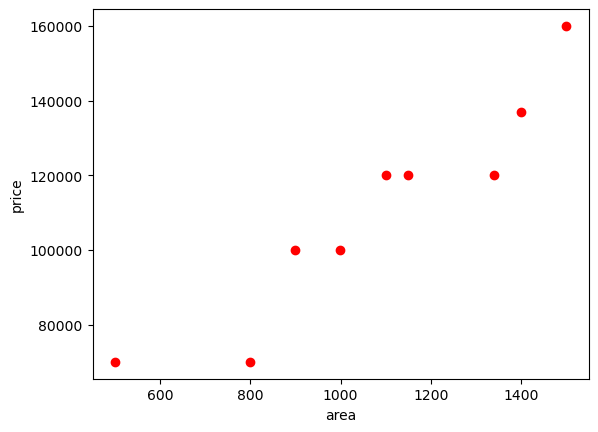

In [4]:
#visualization to identify the relationship
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(data.area, data.price, color='red')

In [5]:
#store input value AS X and output value AS y
X = selected_columns[['area']].values 
y = selected_columns['price'].values 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model_1= LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions for test values
y_pred = model_1.predict(selected_columns[['area']].values)
y_pred

array([104768.31929525, 114087.84374157,  86406.08796041, 150996.85144979,
        58724.33217925, 118701.4697051 , 141769.59952273, 136233.2483665 ,
        95633.33988747])

In [7]:
df = pd.DataFrame({'area':selected_columns['area'].values.flatten(), 'astual':selected_columns['price'].values.flatten(),'Predict':y_pred})
df
#'area':X_test.flatten() = above code u use X data as 2-dimensional array.
#DataFrame constructor expects the values for each column to be 1-dimensional

,area,astual,Predict
0,999,100000,104768.319295
1,1100,120000,114087.843742
2,800,70000,86406.087960
3,1500,160000,150996.851450
4,500,70000,58724.332179
5,1150,120000,118701.469705
6,1400,137000,141769.599523
7,1340,120000,136233.248367
8,900,100000,95633.339887


In [8]:
# Evaluate the model
mse = mean_squared_error(selected_columns['price'].values, y_pred)
 # how well our model explains the variation in the actual data.
r2 = r2_score(selected_columns['price'].values, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 93563209.43469757
R^2 Score: 0.8783762362913965


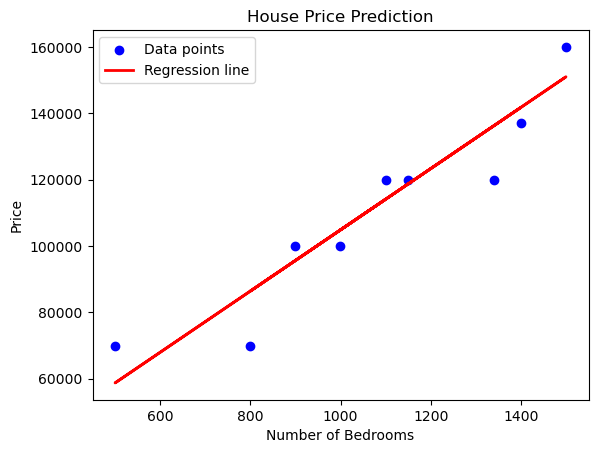

In [9]:
# Visualize the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(selected_columns['area'].values, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('House Price Prediction')
plt.legend()  #to display LABLES
plt.show()

<h2 style='color:green' align='center'>multiple Linear Regression Example</h2>

In [30]:
# Load the data from the CSV file
data = pd.read_csv('Housing.csv')

In [31]:
#Strip whitespace from column names.
data.columns = data.columns.str.strip()

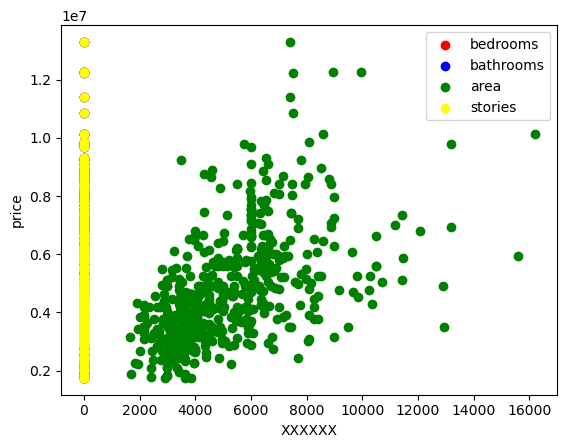

In [32]:
#visualization to identify the relationship
plt.xlabel('XXXXXX')
plt.ylabel('price')
plt.scatter(data.bedrooms, data.price, color='red',label='bedrooms')
plt.scatter(data.bathrooms, data.price, color='blue',label='bathrooms')
plt.scatter(data.area, data.price, color='green',label='area')
plt.scatter(data.stories, data.price, color='yellow',label='stories')
plt.legend()

In [33]:
# Prepare the data
# Independent variables (number of bedrooms, bathrooms, and size of the house)
X2 = data[['bedrooms', 'bathrooms', 'area', 'stories']].values
# Dependent variable (house price)
y2 = data['price'].values

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train the linear regression model
model_2 = LinearRegression()
model_2.fit(X2_train, y2_train)

LinearRegression()

In [41]:
# Make predictions
y2_pred = model_2.predict(X2_test)

In [43]:
df = pd.DataFrame({'astual':y2_test,'Predict':y2_pred})
df

,astual,Predict
0,4060000,6.177577e+06
1,6650000,6.696157e+06
2,3710000,3.437038e+06
3,6440000,4.430632e+06
4,2800000,3.583802e+06
...,...,...
104,9100000,4.954327e+06
105,3773000,5.278906e+06
106,7910000,7.180197e+06
107,7350000,6.037793e+06


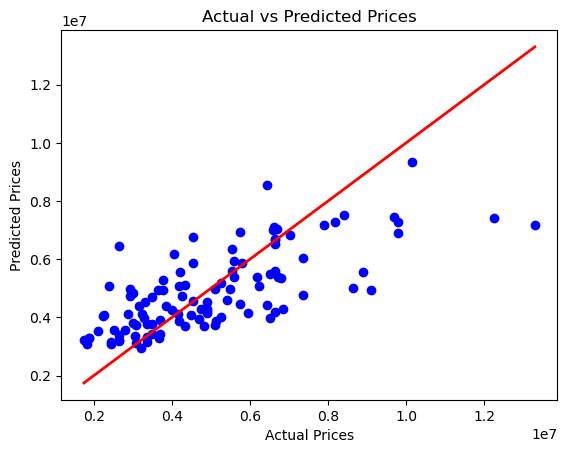

In [44]:
# Visualize the results
plt.scatter(y2_test, y2_pred, color='blue')
plt.plot([y2_test.min(), y2_test.max()], [y2_test.min(), y2_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

<h2 style='color:green' align='center'>Polynomial Regression Example</h2>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [46]:
# Generate sample data
#get the same "random" numbers.
np.random.seed(42)
# Generate 100 random values for X between 0 and 2
X = 2 * np.random.rand(100, 1)
# Generate corresponding y values based on a quadratic relationship with some noise
y = 4 + 3 * X + 0.5 * X**2 + np.random.randn(100, 1)  # Quadratic relationship

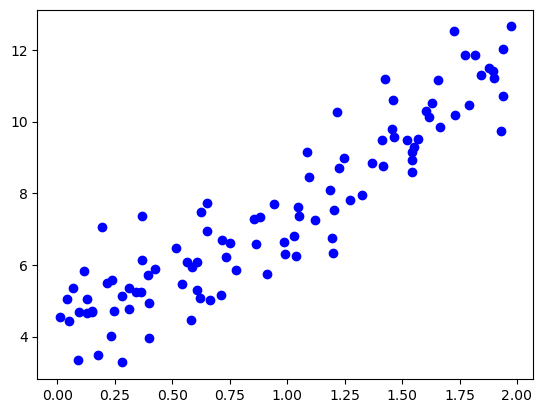

In [53]:
#Identify Pattern
plt.scatter(X, y, color='blue', label='Data points')
plt.show()

#after study this we can better like to curve behavior.

In [47]:
# Transform data to include polynomial features
degree = 2
# Create an instance of PolynomialFeatures with the specified degree
#include_bias=False: Doesn't add that extra column of ones.It is not needed
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
# Transform the original features X into polynomial features X_poly
X_poly = poly_features.fit_transform(X)

In [48]:
# Fit linear regression model to the polynomial transformed data
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [49]:
# Generate predictions
# Generate 100 new data points evenly spaced between 0 and 2
X_new = np.linspace(0, 2, 100).reshape(100, 1)

# Transform the new data points into polynomial features using the same polynomial transformation used for training data
X_new_poly = poly_features.transform(X_new)

# Use the trained polynomial regression model to predict the target variable (y) for the new data points
y_new = model.predict(X_new_poly)



In [50]:
# Create a DataFrame to display the values in a tabular format
df = pd.DataFrame({'X_new': X_new.flatten(), 'y_new': y_new.flatten()})
df

,X_new,y_new
0,0.000000,4.561403
1,0.020202,4.594953
2,0.040404,4.629385
3,0.060606,4.664700
4,0.080808,4.700897
...,...,...
95,1.919192,11.688606
96,1.939394,11.805985
97,1.959596,11.924246
98,1.979798,12.043390


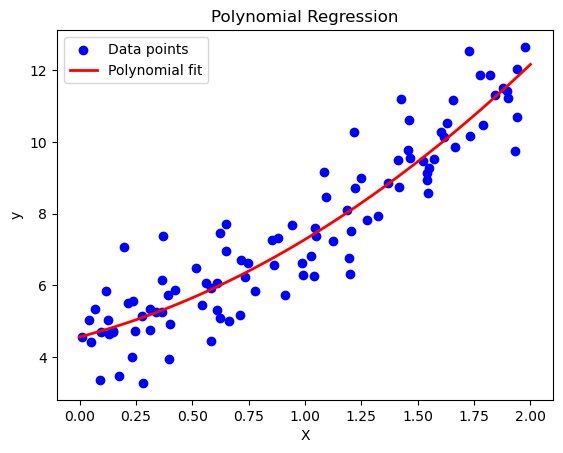

In [51]:
# Visualize the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
